<a href="https://colab.research.google.com/github/JulieOnIsland/Data-Analytics/blob/main/Covid_Vaccination_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Covid Vaccination Status

-You can download the csv file from here: https://ourworldindata.org/covid-vaccinations


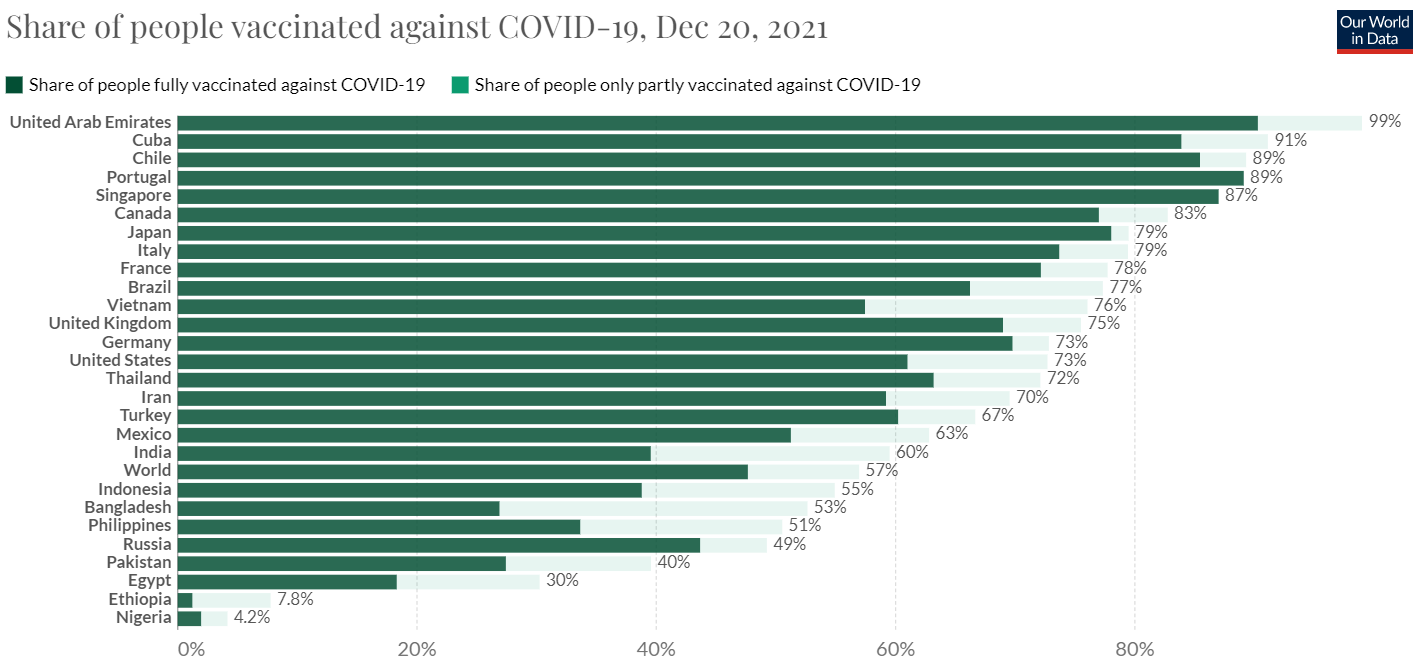

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dpath = '/content/drive/MyDrive/data/owid-covid-data.csv'
df = pd.read_csv(dpath)

In [ ]:
df['people_partly_vaccinated'] = df.people_vaccinated - df.people_fully_vaccinated
df = df [['location', 'people_vaccinated','people_fully_vaccinated', 'people_partly_vaccinated','population']]
df = df.dropna()
df = df.drop(df.index[df['location'] == 'World'])
df = df.drop(df.index[df['location'] == 'Asia'])
df = df.drop(df.index[df['location'] == 'Upper middle income'])
df = df.drop(df.index[df['location'] == 'Lower middle income'])
df = df.drop(df.index[df['location'] == 'High income'])
df = df.drop(df.index[df['location'] == 'Europe'])
df = df.drop(df.index[df['location'] == 'European Union'])
df = df.drop(df.index[df['location'] == 'North America'])
df = df.drop(df.index[df['location'] == 'South America'])
df = df.drop(df.index[df['location'] == 'Africa'])

In [ ]:
df['fully_vaccinated_proportion'] = round(df['people_fully_vaccinated'] / df['population'],4) * 100
df['partly_vaccinated_proportion'] = round(df['people_partly_vaccinated'] / df['population'],4) * 100
df['total_vaccinated_proportion'] = df['fully_vaccinated_proportion'] + df['partly_vaccinated_proportion']

In [ ]:
df = df.drop(df.index[df['total_vaccinated_proportion'] > 100])
df.sort_values('total_vaccinated_proportion', ascending=False, inplace=True)
df.drop_duplicates('location',inplace=True)
df.head(10)

,location,people_vaccinated,people_fully_vaccinated,people_partly_vaccinated,population,fully_vaccinated_proportion,partly_vaccinated_proportion,total_vaccinated_proportion
99044,Pitcairn,4.700000e+01,3.000000e+01,17.0,4.700000e+01,63.83,36.17,100.00
47631,Gibraltar,3.345700e+04,2.956000e+04,3897.0,3.369100e+04,87.74,11.57,99.31
128758,United Arab Emirates,9.801529e+06,8.832256e+06,969273.0,9.991083e+06,88.40,9.70,98.10
110372,Singapore,5.071148e+06,5.012181e+06,58967.0,5.453600e+06,91.91,1.08,92.99
18542,Brunei,4.034050e+05,3.477730e+05,55632.0,4.415320e+05,78.77,12.60,91.37
30498,Cuba,1.016370e+07,9.195366e+06,968329.0,1.131750e+07,81.25,8.56,89.81
100360,Portugal,9.053901e+06,8.925907e+06,127994.0,1.016792e+07,87.78,1.26,89.04
25264,Chile,1.685484e+07,1.611472e+07,740121.0,1.921236e+07,83.88,3.85,87.73
23368,Cayman Islands,5.795200e+04,5.582900e+04,2123.0,6.649800e+04,83.96,3.19,87.15
25934,China,1.225000e+09,1.076308e+09,148692000.0,1.444216e+09,74.53,10.30,84.83


In [ ]:
top_20_df = df[:20]
top_20_df.sort_values('total_vaccinated_proportion', ascending=True, inplace=True)
top_20_df

,location,people_vaccinated,people_fully_vaccinated,people_partly_vaccinated,population,fully_vaccinated_proportion,partly_vaccinated_proportion,total_vaccinated_proportion
22406,Canada,3.048483e+07,2.902281e+07,1462023.0,3.806791e+07,76.24,3.84,80.08
5486,Argentina,3.666690e+07,2.971078e+07,6956115.0,4.560582e+07,65.15,15.25,80.40
100937,Qatar,2.360308e+06,2.218292e+06,142016.0,2.930524e+06,75.70,4.85,80.55
41948,Faeroe Islands,4.020500e+04,3.814200e+04,2063.0,4.905300e+04,77.76,4.21,81.97
116223,Spain,3.833940e+07,3.761514e+07,724260.0,4.674521e+07,80.47,1.55,82.02
109106,Seychelles,8.193700e+04,7.795100e+04,3986.0,9.891000e+04,78.81,4.03,82.84
114945,South Korea,4.256786e+07,4.106166e+07,1506210.0,5.130518e+07,80.03,2.94,82.97
56169,Iceland,2.857210e+05,2.811920e+05,4529.0,3.433600e+05,81.89,1.32,83.21
21094,Cambodia,1.414561e+07,1.335151e+07,794092.0,1.694645e+07,78.79,4.69,83.48
78389,Malta,4.357130e+05,4.322530e+05,3460.0,5.161000e+05,83.75,0.67,84.42


In [ ]:
country_name_list = []
for i in range(len(top_20_df)):
    country_name_list.append(top_20_df['location'].iloc[i])

In [ ]:
fully_vacc_list = []
for i in range(20):
    fully_vacc_list.append(int(top_20_df['fully_vaccinated_proportion'].iloc[19-i] + top_20_df['partly_vaccinated_proportion'].iloc[19-i]))
fully_vacc_str_list = [str(i) + '%' for i in fully_vacc_list]
fully_vacc_str_list

['100%',
 '99%',
 '98%',
 '92%',
 '91%',
 '89%',
 '89%',
 '87%',
 '87%',
 '84%',
 '84%',
 '83%',
 '83%',
 '82%',
 '82%',
 '82%',
 '81%',
 '80%',
 '80%',
 '80%']

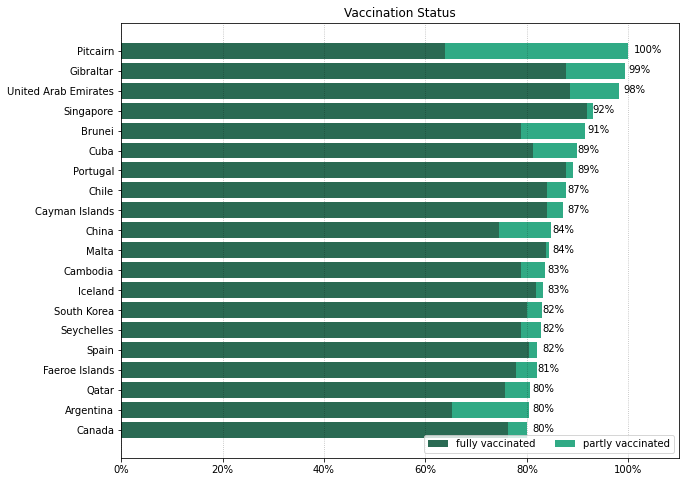

In [ ]:
x = np.arange(20)
y1 = top_20_df['fully_vaccinated_proportion']
y2 = top_20_df['partly_vaccinated_proportion']

fig = plt.figure(figsize=(10, 8))
ax1 = plt.subplot(1,1,1)
ax1.barh(x, y1, color='#2a6a53', label='fully vaccinated')
ax1.barh(x, y2, color='#30AA85', left=y1, label='partly vaccinated')
for i in range(20):
    ax1.annotate(fully_vacc_str_list[i] , xy=(fully_vacc_list[i]+1,19-i-0.1))
plt.xticks(np.arange(0, 101, 20), labels=['0%', '20%', '40%', '60%', '80%','100%'])
y_labels = country_name_list
plt.yticks(x, y_labels)
plt.grid(axis='x', c='k', ls=':', alpha=0.3)
plt.title('Vaccination Status')
plt.legend(loc='lower right',ncol=2)
plt.xlim([0, 110])
plt.show();
